In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
train=pd.read_csv('train1.csv')
test=pd.read_csv('test1.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


shape of train dataset

In [5]:
test.shape

(1459, 80)

In [6]:
train.shape

(1460, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Analysis on target variable

C:\anaconda 4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


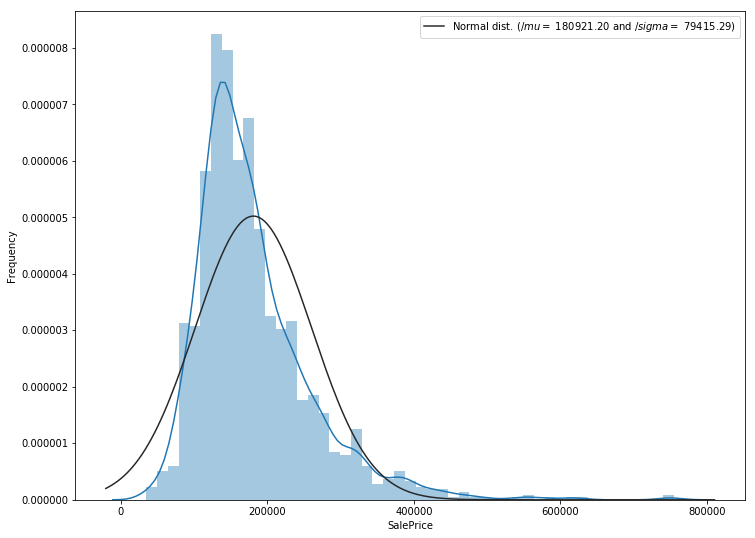

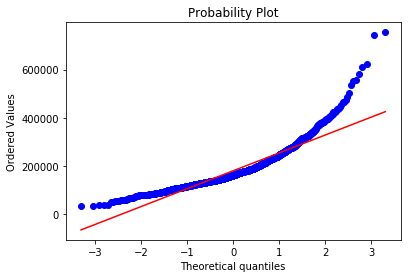

In [8]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
fig= plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

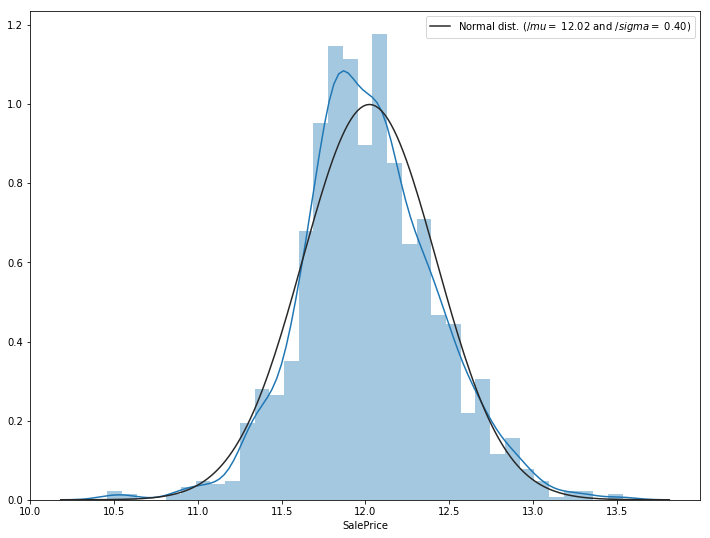

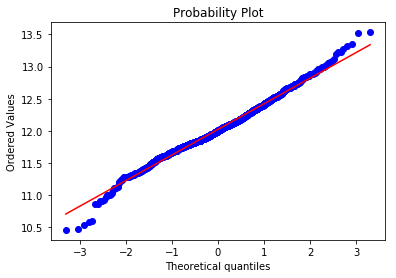

In [9]:
#using log function
train['SalePrice']= np.log1p(train['SalePrice'])
#check again for normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'],fit=stats.norm)
(mu,sigma) = stats.norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($/mu=$ {:.2f} and $/sigma=$ {:.2f})'.format(mu, sigma)],loc='best')
fig= plt.figure()
stats.probplot(train['SalePrice'],plot=plt)
plt.show()


# Checking for missing values 

In [10]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

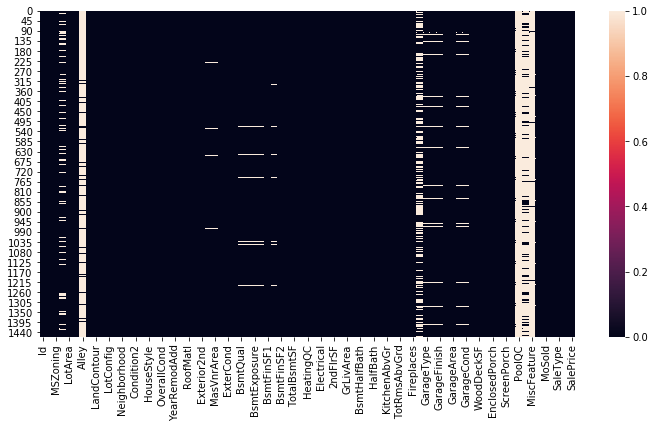

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

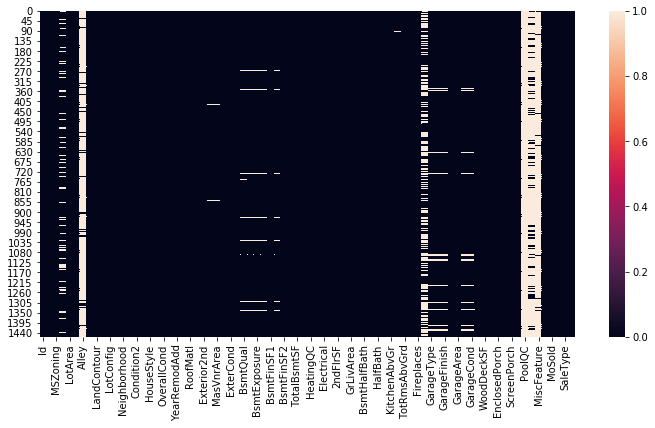

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(test.isnull())
plt.show()

In [14]:
Isnull =train.isnull().sum()/len(train)*100
Isnull=Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending =False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [15]:
Isnull1 =test.isnull().sum()/len(test)*100
Isnull1=Isnull1[Isnull1>0]
Isnull1.sort_values(inplace=True, ascending =False)
Isnull1

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

In [16]:
Isnull= Isnull.to_frame()
Isnull1= Isnull1.to_frame()

In [17]:
Isnull.columns =['count']
Isnull1.columns =['count']

In [18]:
Isnull.index.names=['Name']
Isnull1.index.names=['Name']

In [19]:
Isnull['Name']=Isnull.index
Isnull1['Name']=Isnull1.index

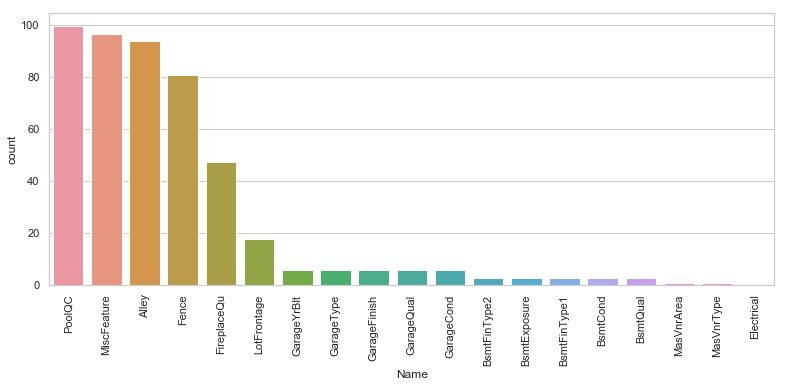

In [20]:
plt.figure(figsize=(13,5))
sns.set(style='whitegrid')
sns.barplot(x='Name',y='count',data=Isnull)
plt.xticks(rotation=90)
plt.show()

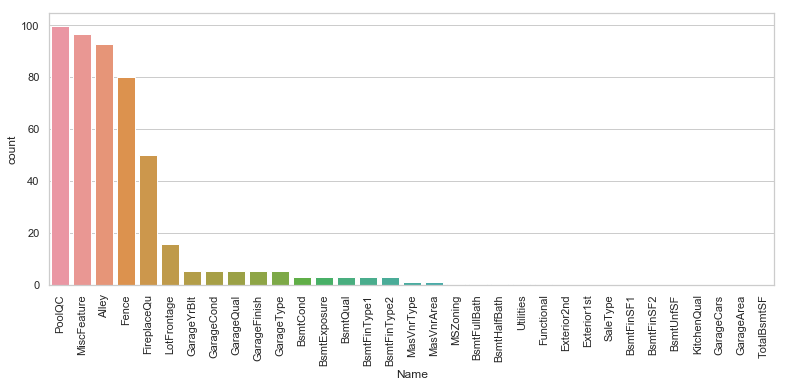

In [21]:
plt.figure(figsize=(13,5))
sns.set(style='whitegrid')
sns.barplot(x='Name',y='count',data=Isnull1)
plt.xticks(rotation=90)
plt.show()

In [22]:
train_corr = train.select_dtypes(include=[np.number])

In [23]:
train_corr.shape

(1460, 38)

In [24]:
del train_corr['Id']

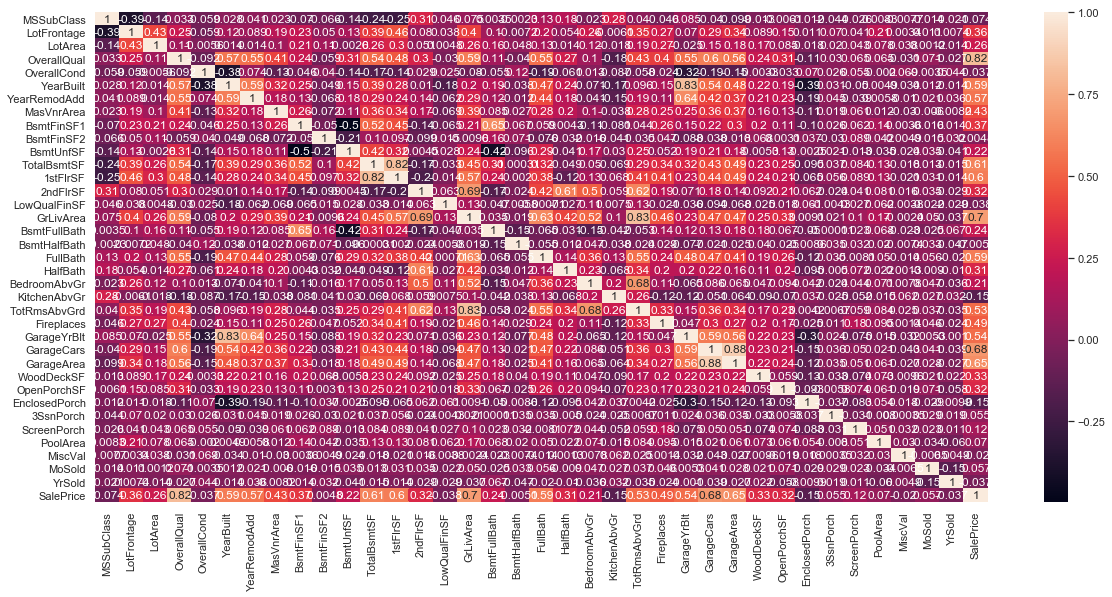

In [25]:
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr,annot=True)

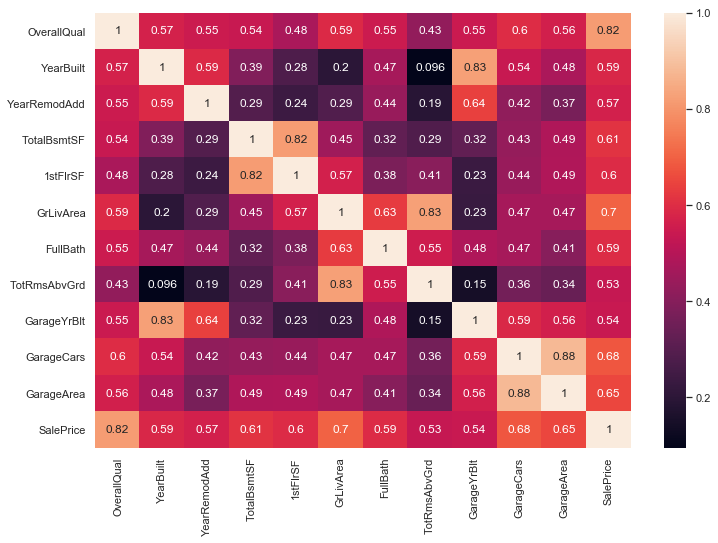

In [26]:
top_feature =corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12,8))
top_corr =train[top_feature].corr()
sns.heatmap(top_corr,annot=True)
plt.show()

In [27]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

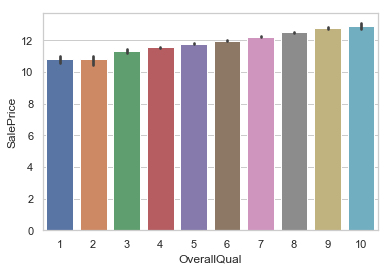

In [28]:
sns.barplot(train.OverallQual,train.SalePrice)

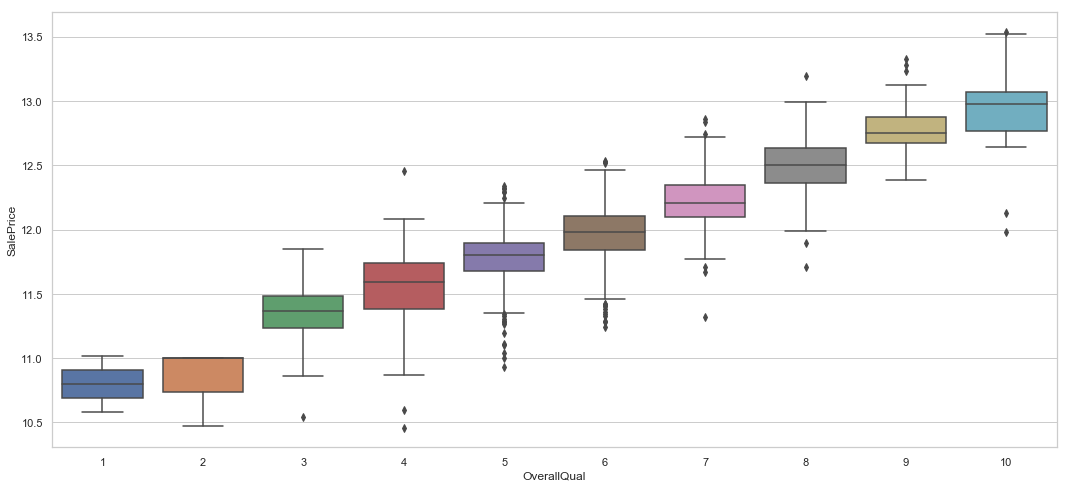

In [29]:
plt.figure(figsize=(18,8))
sns.boxplot(x=train.OverallQual,y=train.SalePrice)

C:\anaconda 4\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


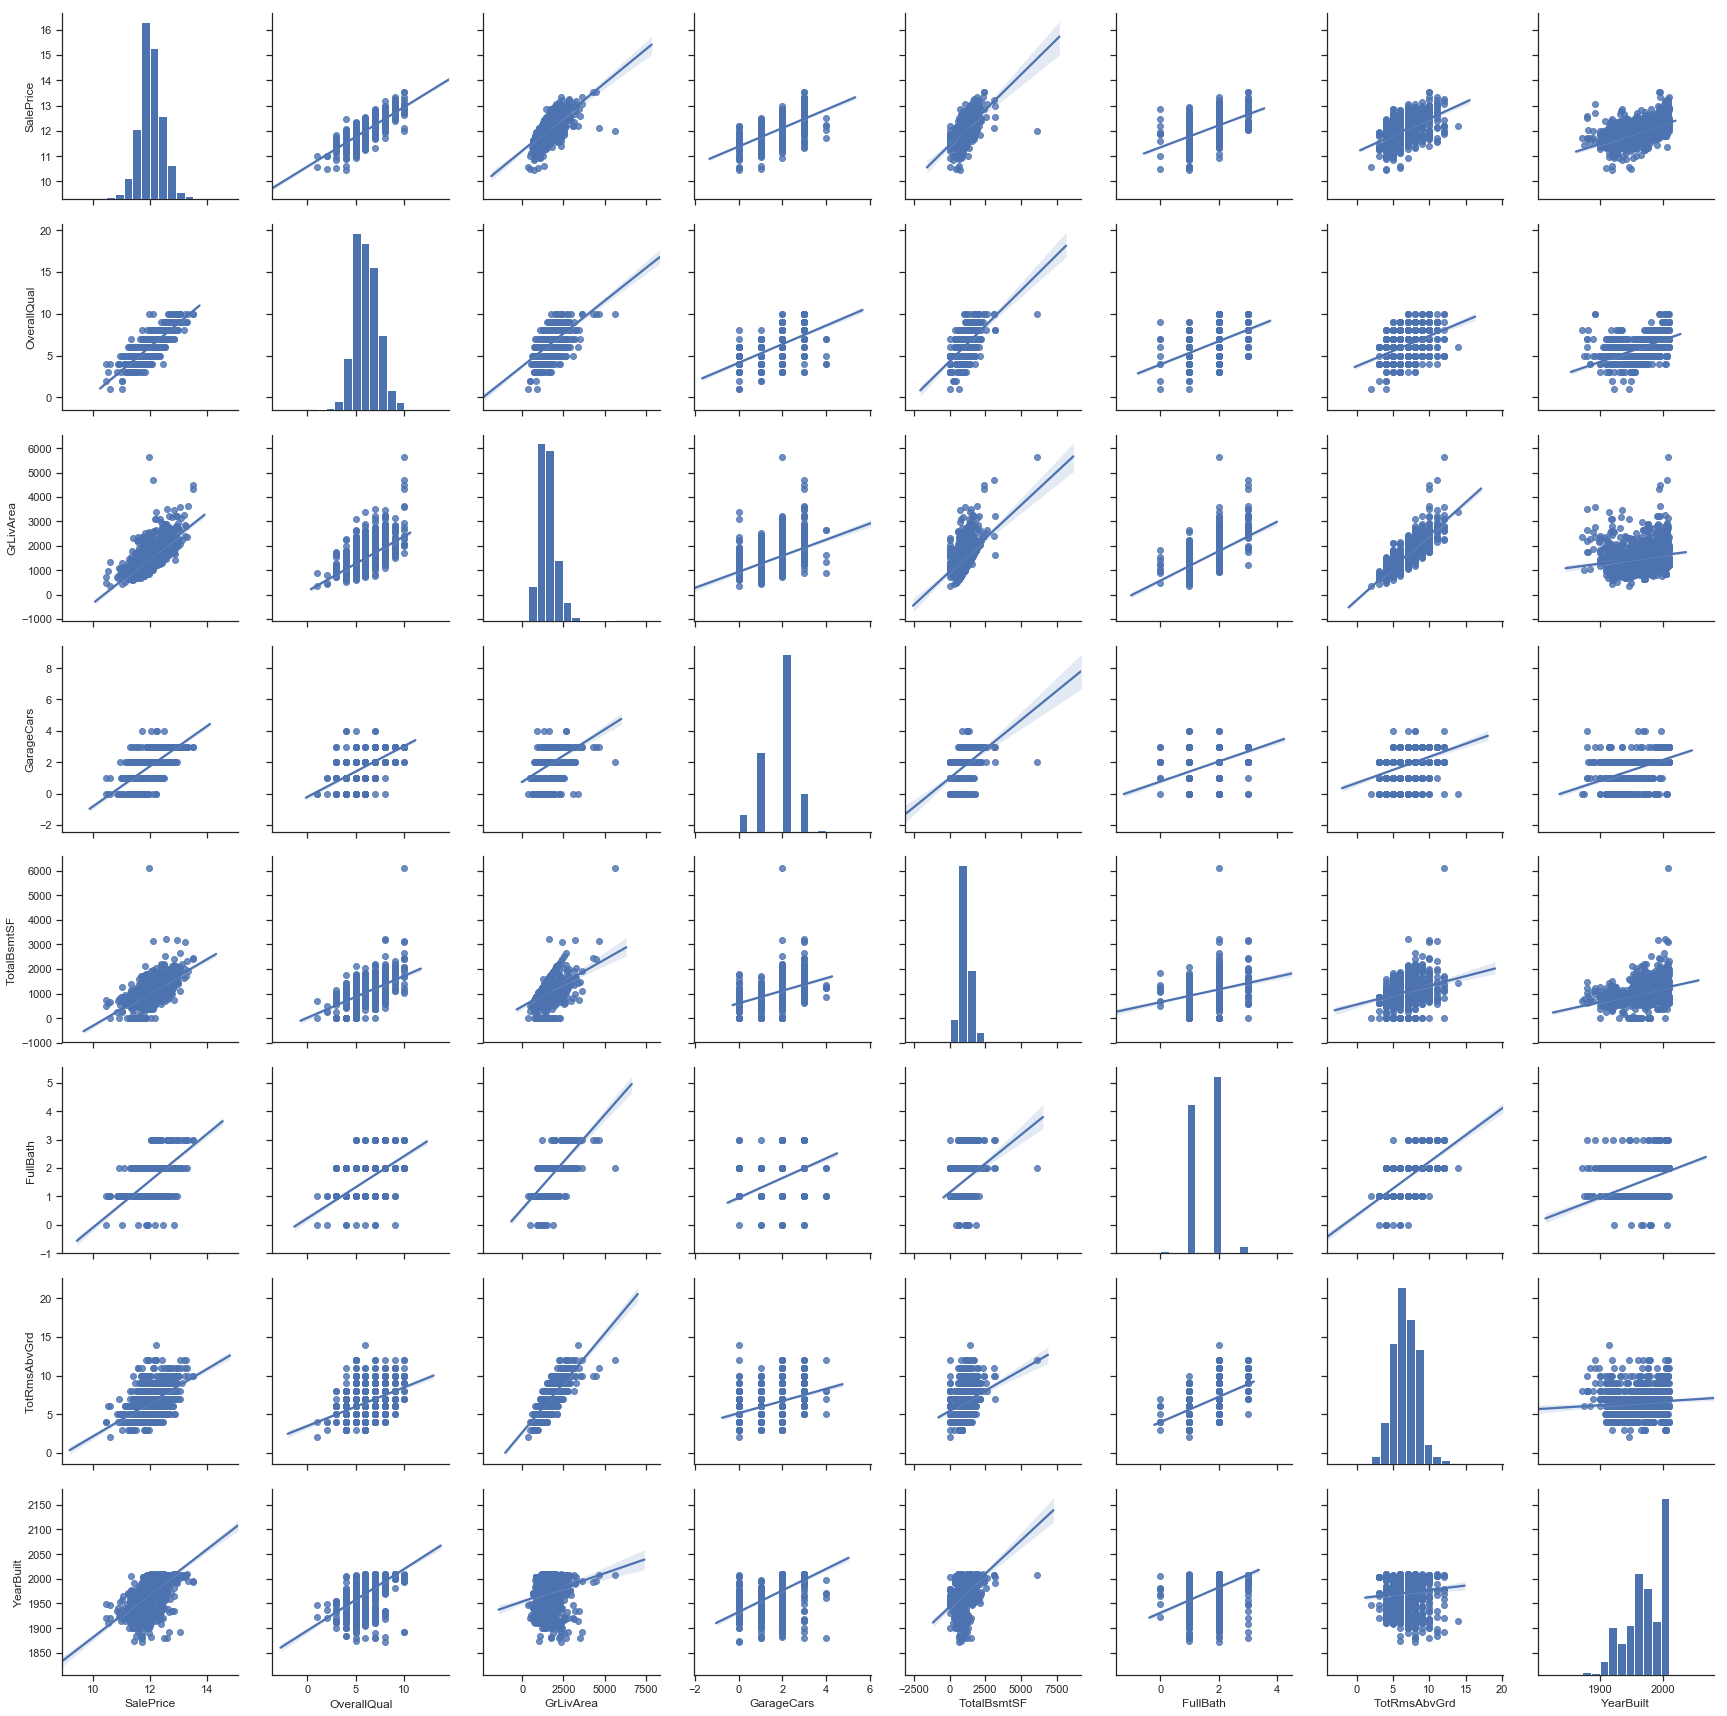

In [30]:
col=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col],size=3,kind='reg')

In [31]:
print('find the most important features relative to target')
corr =train.corr()
corr.sort_values(['SalePrice'],ascending =False,inplace=True)
corr.SalePrice

find the most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

# Imputting missing values

In [32]:
train['PoolQC']=train['PoolQC'].fillna('None')
test['PoolQC']=test['PoolQC'].fillna('None')

In [33]:
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [34]:
train['LotFrontage']= train.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
test['LotFrontage']= test.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [35]:
#garagetype,garagefinish,garagequal and garagecond are replaced with none
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    train[col] = train[col].fillna('None')
#garagetype,garagefinish,garagequal and garagecond are replaced with none
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    test[col] = test[col].fillna('None')
    

In [36]:
#garageyrblt,garagearea,garagecars are replaced with none
for col in ['GarageYrBlt','GarageArea','GarageCars']:
    train[col] = train[col].fillna(int(0))
#garageyrblt,garagearea,garagecars are replaced with none
for col in ['GarageYrBlt','GarageArea','GarageCars']:
    test[col] = test[col].fillna(int(0))    

In [37]:
for col in ('BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual'):
    train[col] = train[col].fillna('None')    
for col in ('BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual'):
    test[col] = test[col].fillna('None')        

In [38]:
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))
test['MasVnrArea'] = test['MasVnrArea'].fillna(int(0))

In [39]:
train['MasVnrArea'] = train['MasVnrArea'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna('None')

In [40]:
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])

In [41]:
train = train.drop(['Utilities'],axis=1)
test = test.drop(['Utilities'],axis=1)

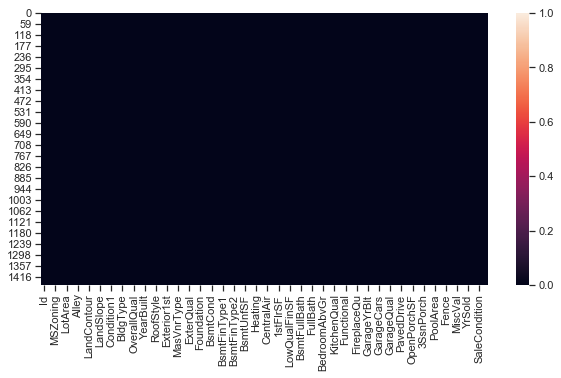

In [42]:
plt.figure(figsize =(10,5))
sns.heatmap(train.isnull())

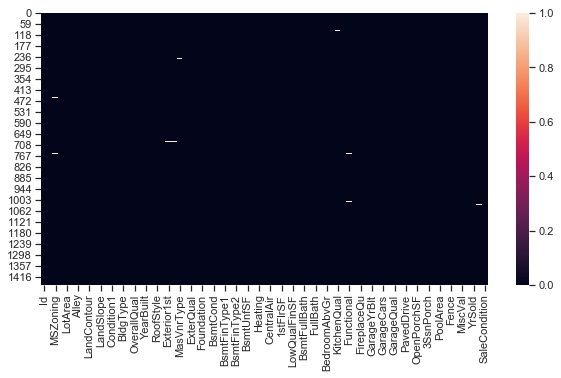

In [43]:
plt.figure(figsize =(10,5))
sns.heatmap(test.isnull())

In [44]:
train = train.drop(['SaleCondition'], axis = 1)
test = test.drop(['SaleCondition'], axis = 1)

imputing missing values present exclusively in test dataset

In [45]:
test['BsmtFinSF1']= test.groupby("Neighborhood")["BsmtFinSF1"].transform(lambda x:x.fillna(x.median()))
test['BsmtFinSF2']= test.groupby("Neighborhood")["BsmtFinSF2"].transform(lambda x:x.fillna(x.median()))
test['BsmtUnfSF']= test.groupby("Neighborhood")["BsmtUnfSF"].transform(lambda x:x.fillna(x.median()))
test['TotalBsmtSF']= test.groupby("Neighborhood")["TotalBsmtSF"].transform(lambda x:x.fillna(x.median()))
test['GarageCars']= test.groupby("Neighborhood")["GarageCars"].transform(lambda x:x.fillna(x.median()))
test['GarageArea']= test.groupby("Neighborhood")["GarageArea"].transform(lambda x:x.fillna(x.median()))

In [46]:
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(int(0))
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(int(0))


In [47]:
test['MSZoning']=test['MSZoning'].fillna('None')
test['Exterior1st']=test['Exterior1st'].fillna('None')
test['Exterior2nd']=test['Exterior2nd'].fillna('None')
test['KitchenQual']=test['KitchenQual'].fillna('None')
test['Functional']=test['Functional'].fillna('None')
test['SaleType']=test['SaleType'].fillna('None')

In [48]:
train = train.drop(['Exterior1st'], axis = 1)
test = test.drop(['Exterior1st'], axis = 1)

now there are no missing values

# Encoding str to int 

In [49]:
cols=('FireplaceQu','BsmtQual','BsmtCond','GarageQual','GarageCond',
      'ExterQual','ExterCond','HeatingQC','PoolQC','KitchenQual','BsmtFinType1',
      'BsmtFinType2','Functional','Fence','BsmtExposure','GarageFinish','LandSlope',
     'LotShape','PavedDrive','Street','Alley','CentralAir','MSSubClass','OverallCond',
     'YrSold','MoSold','MSZoning','LandContour','LotConfig','Neighborhood',
     'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MiscFeature',
     'Exterior2nd','MasVnrType','MasVnrArea','Foundation','GarageType','MiscFeature',
     'SaleType','Electrical','Heating')

In [50]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

In [51]:
train.shape

(1460, 78)

In [52]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl= LabelEncoder()
    lbl.fit(list(test[c].values))
    test[c] = lbl.transform(list(test[c].values))

# preparing data for prediction

In [53]:
y=train['SalePrice']

In [54]:
del train['SalePrice']

In [55]:
X = train.values
y = y.values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test1,y_train, y_test1 = train_test_split(X,y,test_size =0.2, random_state =7)

# RandomForestRegression

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators =1000)

In [58]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
print("Accuracy",model.score(X_test1,y_test1)*100)

Accuracy 89.38475910533403


# GradientBoostingRegressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
GRB = GradientBoostingRegressor(n_estimators = 100, max_depth=4)

In [61]:
GRB.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
print("Accuracy",GRB.score(X_test1,y_test1)*100)

Accuracy 91.32853066490263


# Linear regression

In [63]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [64]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
print("Predict value"+ str(model.predict([X_test1[142]])))
print("real value" + str(y_test1[142]))

Predict value[11.60370779]
real value11.767187766223199


In [66]:
print("Accuracy",model.score(X_test1,y_test1)*100)

Accuracy 88.77102934894131


In [69]:
train.shape

(1460, 77)

In [70]:
test.shape

(1459, 77)

In [73]:
#set ids as PassengerId and predict survival 
ids = test['Id']
predictions = model.predict(test)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'Id' : ids, 'SalePrice': predictions })
output.to_csv('submission4.csv', index=False)

